In [1]:
# !pip install tqdm

In [62]:
from utils import scrape
raw = scrape('tensorflow', 5000) # requires the package called 'tqdm'

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

In [200]:
"""
preprocessing into form:
Column 1  Column 2  Column 3 (type of content)
@ABC      @ABC      Tweet
@XYZ      @ABC      RT
"""
import pandas as pd, numpy as np

# extract Mentions
data = raw.text.str.extractall(r'(?<!RT\s)@(\w+)')[0].reset_index(1,drop=True).rename('target').to_frame().join(raw.user_name)
data['type'] = 'mention'

# add Retweets
data = data.append(raw.text.str.extract(r'RT @(\S+):', expand=False).dropna().rename('target').to_frame().join(raw.user_name))
data.type.fillna('rt',inplace=True)

# add normal Tweets
data = data.append(pd.DataFrame({'target': raw.user_name, 'type': 'tweet', 'user_name': raw.user_name}).loc[lambda i: ~i.index.isin(data.index)]).sort_index()
data.type.fillna('tweet',inplace=True)

# reorder columns
data = data[['user_name','target','type']]

In [252]:
from networkx import from_pandas_dataframe, betweenness_centrality, closeness_centrality, draw
g = from_pandas_dataframe(data, source='user_name', target='target')
results = pd.DataFrame({'degree': g.degree(),'betweenness': betweenness_centrality(g), 'closeness': closeness_centrality(g)})

In [235]:
results.sort_values('betweenness',ascending=False).head(10)

,betweenness,closeness,degree
TensorFlow,0.317750,0.310765,808
fchollet,0.146877,0.245010,406
arichduvet,0.085231,0.277055,86
Reza_Zadeh,0.057517,0.240001,179
java,0.050265,0.234711,132
thomaskipf,0.044981,0.242993,140
subhobrata1,0.043026,0.245442,84
markessien,0.029718,0.205484,77
gp_pulipaka,0.028447,0.234570,63
ErmiaBivatan,0.023483,0.271762,19


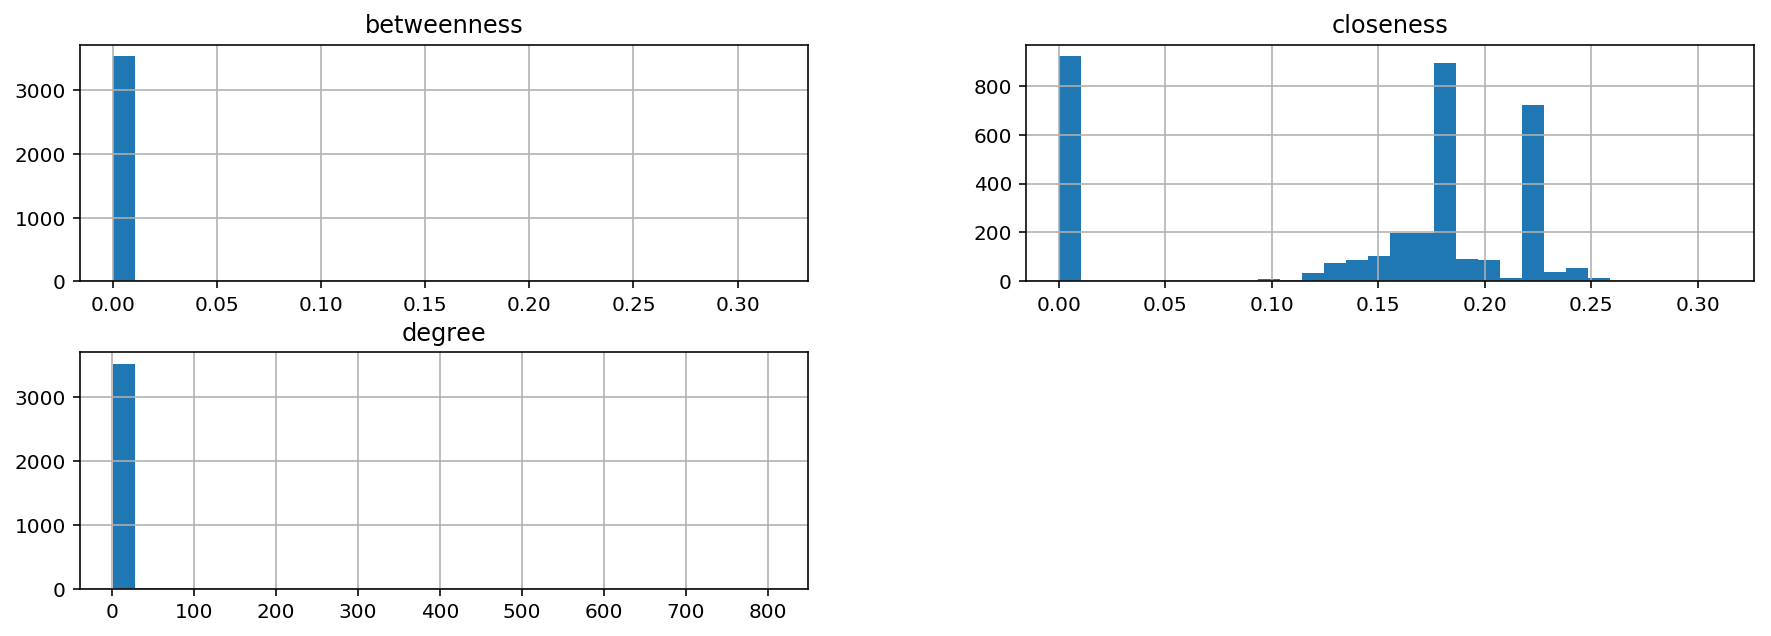

In [251]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,5)
results.hist(bins=30);

/Users/Jake/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/Jake/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/Jake/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/Jake/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without f

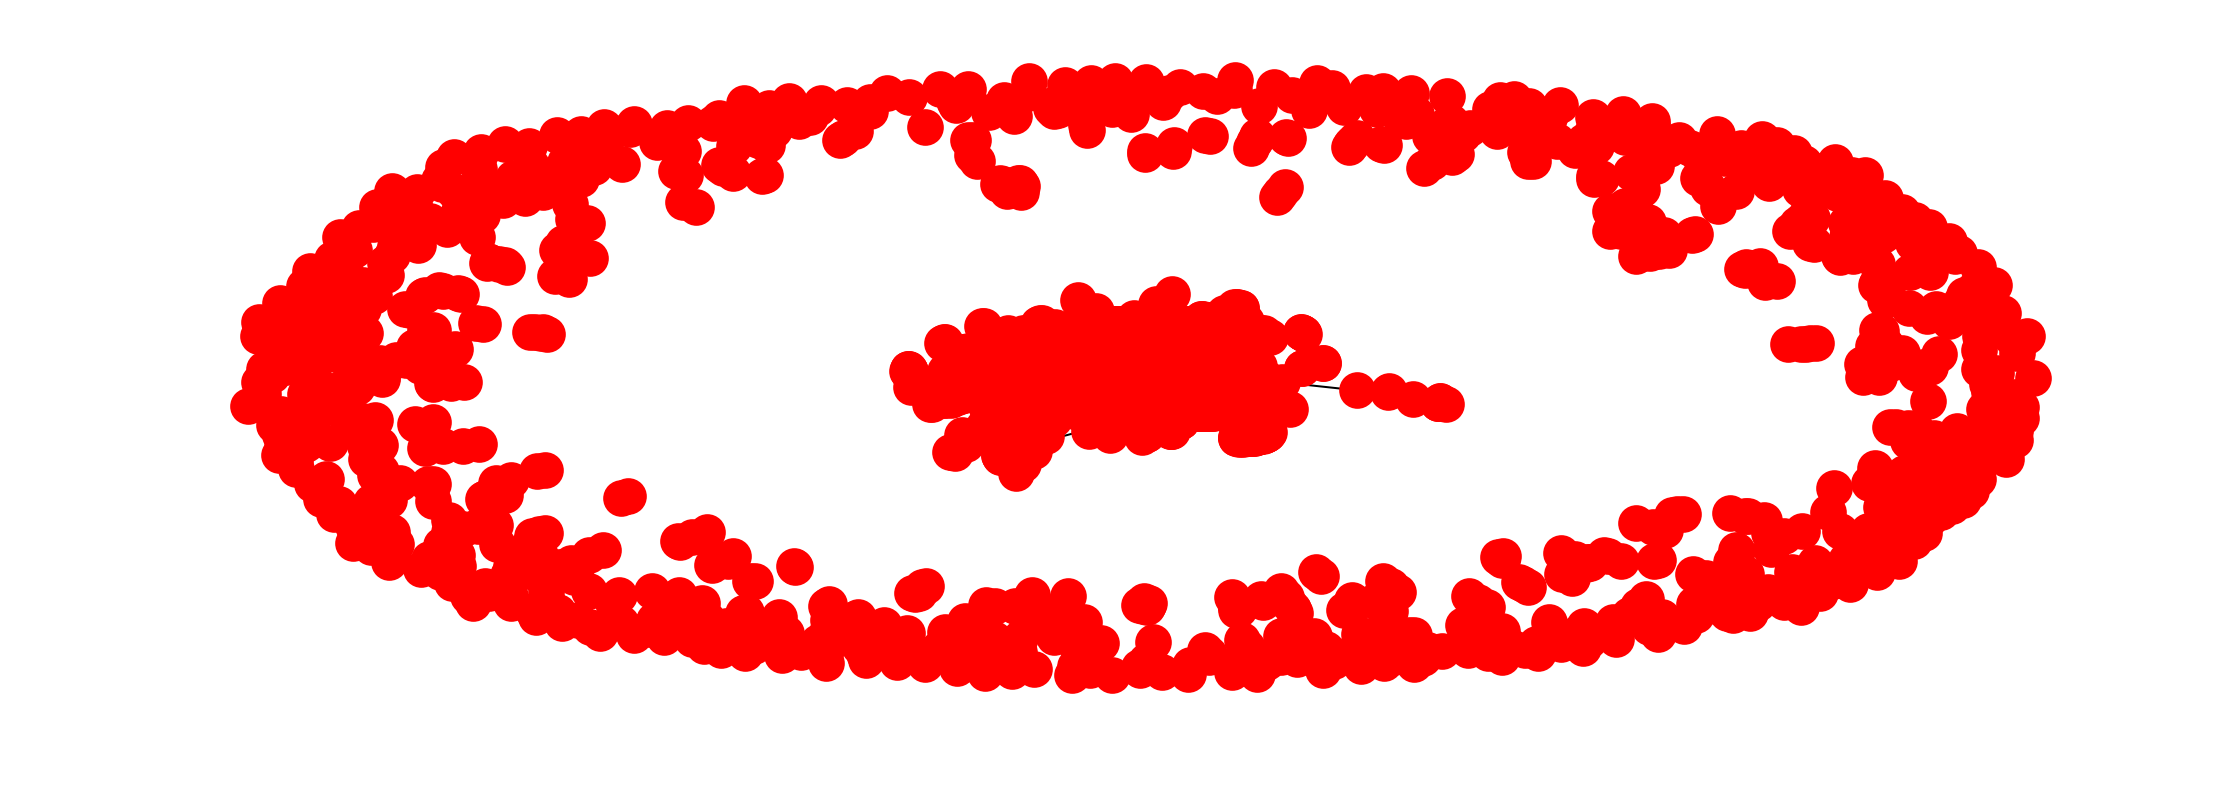

In [253]:
draw(g)